# Project

In [2]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

In [6]:

#Implement the number of vertical and horizontal corners
nb_vertical = 6
nb_horizontal = 9

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((nb_horizontal*nb_vertical,3), np.float32)
objp[:,:2] = np.mgrid[0:nb_vertical,0:nb_horizontal].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

images = glob.glob('mynteye/*.png')
assert images


for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    #Implement findChessboardCorners here 
    ret, corners = cv2.findChessboardCorners(gray, (nb_vertical, nb_horizontal),flags=cv2.CALIB_CB_FAST_CHECK)  

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)

        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (nb_vertical,nb_horizontal), corners,ret)
        cv2.imshow('img',img)
        cv2.waitKey(500)

cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x55e1ed95b830) is not the object's thread (0x55e1ecd8f640).
Cannot move to target thread (0x55e1ed95b830)

QObject::moveToThread: Current thread (0x55e1ed95b830) is not the object's thread (0x55e1ecd8f640).
Cannot move to target thread (0x55e1ed95b830)

QObject::moveToThread: Current thread (0x55e1ed95b830) is not the object's thread (0x55e1ecd8f640).
Cannot move to target thread (0x55e1ed95b830)

QObject::moveToThread: Current thread (0x55e1ed95b830) is not the object's thread (0x55e1ecd8f640).
Cannot move to target thread (0x55e1ed95b830)

QObject::moveToThread: Current thread (0x55e1ed95b830) is not the object's thread (0x55e1ecd8f640).
Cannot move to target thread (0x55e1ed95b830)

QObject::moveToThread: Current thread (0x55e1ed95b830) is not the object's thread (0x55e1ecd8f640).
Cannot move to target thread (0x55e1ed95b830)

QObject::moveToThread: Current thread (0x55e1ed95b830) is not the object's thread (0x55e1ecd8f640).
Cannot move to tar

Using the extracted corners we can obtain a camera matrix that contains the information needed to undistort images

In [8]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
img = cv2.imread('mynteye/left-0045.png')
h,  w = img.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))

The last step is to actually undistort an image:

Text(0.5, 1.0, 'Undistorted image')

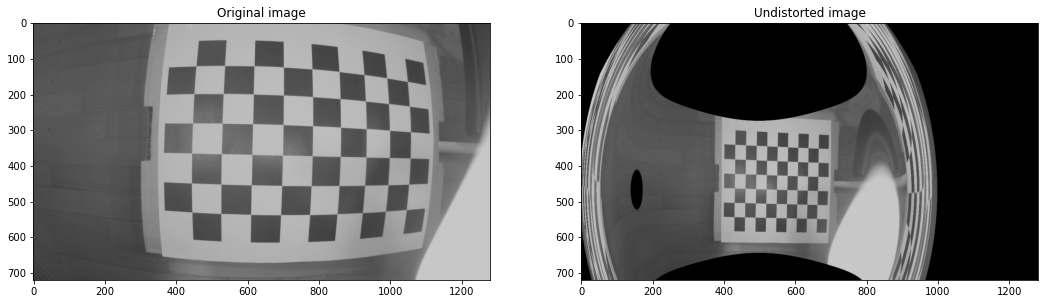

In [10]:
# undistort
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,18))
ax[0].imshow(img[...,[2,1,0]])
ax[0].set_title('Original image')
ax[1].imshow(dst[...,[2,1,0]])
ax[1].set_title('Undistorted image')

A refining step can be to crop the image such that it doesn't contain the large black areas at the edges of the image.

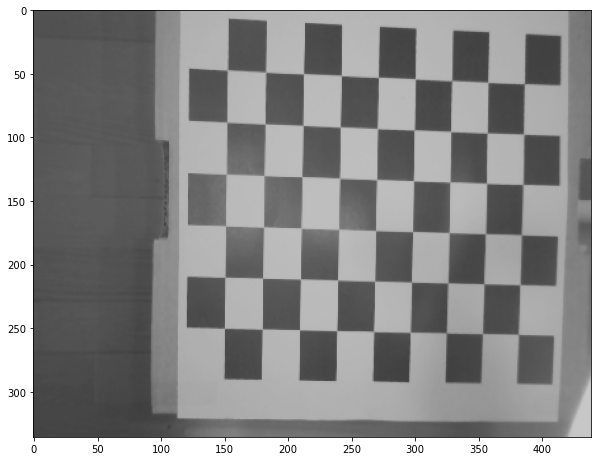

In [11]:
# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
plt.figure(figsize=(10,10))
plt.imshow(dst[...,[2,1,0]])

In [12]:
for fname in images:
    
    img = cv2.imread(fname)
    h,  w = img.shape[:2]
    newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))
    dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
    x,y,w,h = roi
    dst = dst[y:y+h, x:x+w]
    cv2.imshow('img',dst[...,[2,1,0]])
    cv2.waitKey(500)

QObject::moveToThread: Current thread (0x55e1ed95b830) is not the object's thread (0x55e1ecd8f640).
Cannot move to target thread (0x55e1ed95b830)

QObject::moveToThread: Current thread (0x55e1ed95b830) is not the object's thread (0x55e1ecd8f640).
Cannot move to target thread (0x55e1ed95b830)

QObject::moveToThread: Current thread (0x55e1ed95b830) is not the object's thread (0x55e1ecd8f640).
Cannot move to target thread (0x55e1ed95b830)

QObject::moveToThread: Current thread (0x55e1ed95b830) is not the object's thread (0x55e1ecd8f640).
Cannot move to target thread (0x55e1ed95b830)

QObject::moveToThread: Current thread (0x55e1ed95b830) is not the object's thread (0x55e1ecd8f640).
Cannot move to target thread (0x55e1ed95b830)

QObject::moveToThread: Current thread (0x55e1ed95b830) is not the object's thread (0x55e1ecd8f640).
Cannot move to target thread (0x55e1ed95b830)

QObject::moveToThread: Current thread (0x55e1ed95b830) is not the object's thread (0x55e1ecd8f640).
Cannot move to tar

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

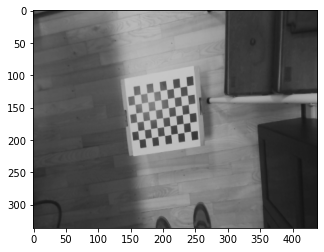

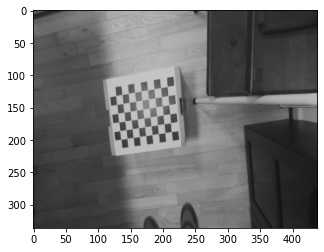

<Figure size 432x288 with 0 Axes>

In [102]:
img1 = cv2.imread('mynteye/left-0004.png')
plt.figure()
img2 = cv2.imread('mynteye/right-0004.png')

h,  w = img1.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))
dst = cv2.undistort(img1, mtx, dist, None, newcameramtx)
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
plt.figure()
plt.imshow(dst[...,[2,1,0]])
img1 = dst[...,[2,1,0]]

h,  w = img2.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))
dst = cv2.undistort(img2, mtx, dist, None, newcameramtx)
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
plt.figure()
plt.imshow(dst[...,[2,1,0]])
img2 = dst[...,[2,1,0]]
img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

plt.figure()

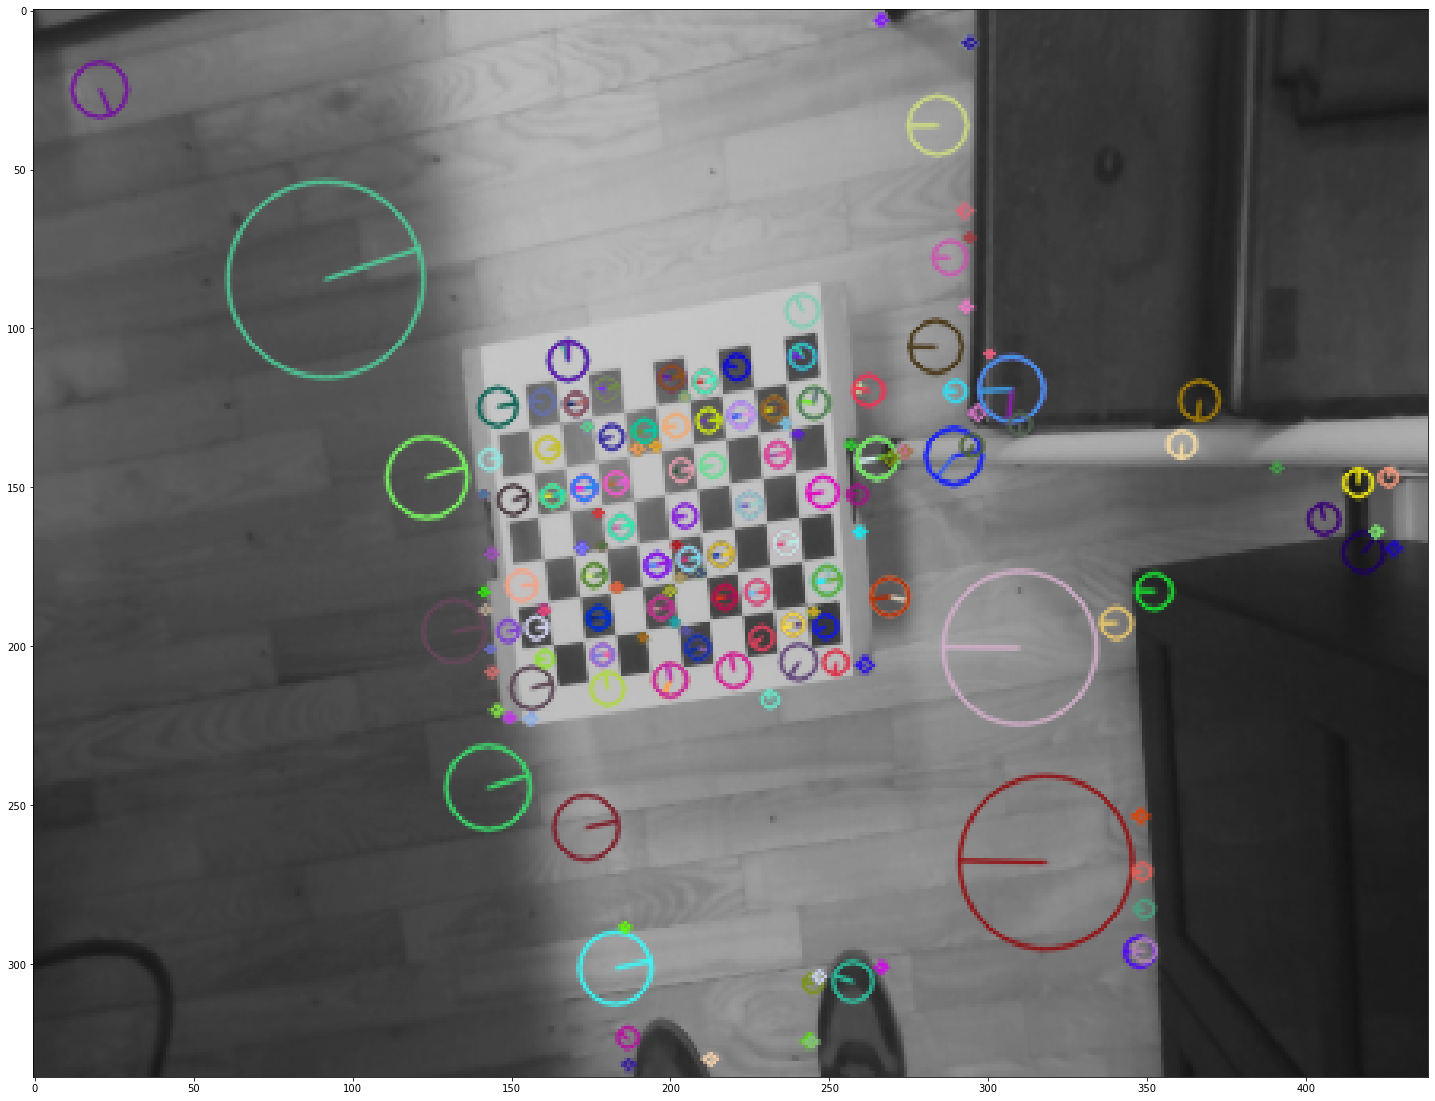

In [103]:

# Initiate SIFT detector
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

imgSift = cv2.drawKeypoints(
    img1, kp1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(25,30))
plt.imshow(imgSift)

In [104]:
# Match keypoints in both images
# Based on: https://docs.opencv.org/master/dc/dc3/tutorial_py_matcher.html
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

# Keep good matches: calculate distinctive image features
# Lowe, D.G. Distinctive Image Features from Scale-Invariant Keypoints. International Journal of Computer Vision 60, 91–110 (2004). https://doi.org/10.1023/B:VISI.0000029664.99615.94
# https://www.cs.ubc.ca/~lowe/papers/ijcv04.pdf
matchesMask = [[0, 0] for i in range(len(matches))]
good = []
pts1 = []
pts2 = []

for i, (m, n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        # Keep this keypoint pair
        matchesMask[i] = [1, 0]
        good.append(m)
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)

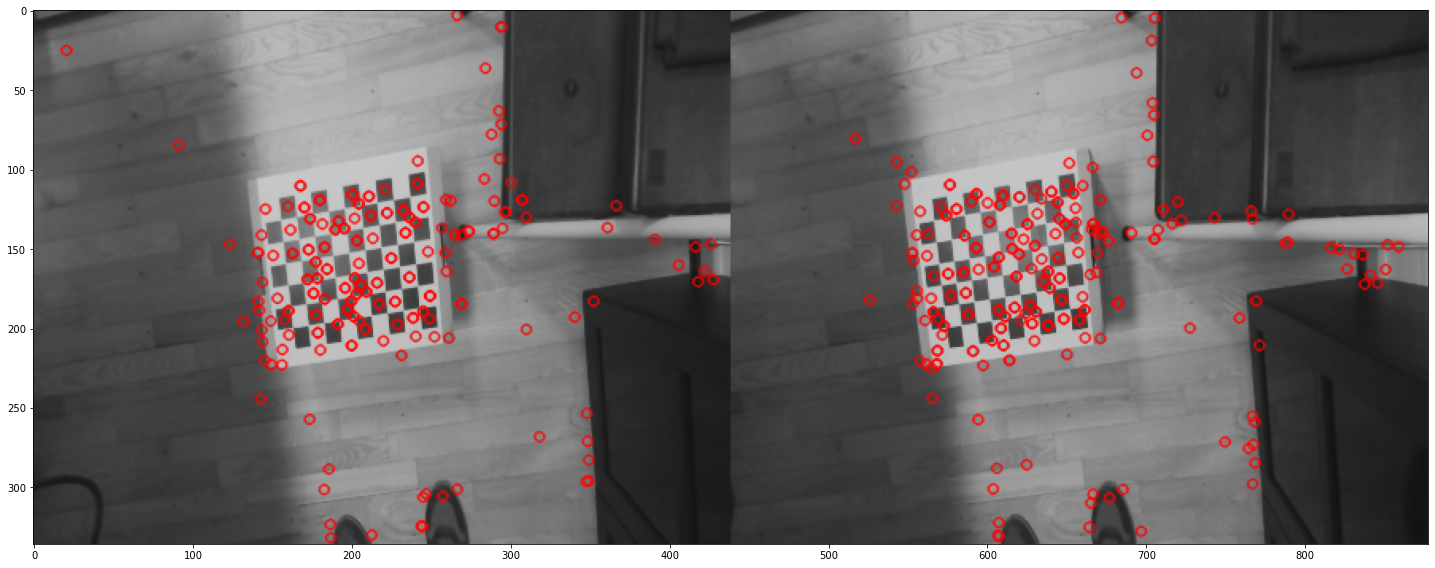

In [105]:
# Draw the keypoint matches between both pictures
# Still based on: https://docs.opencv.org/master/dc/dc3/tutorial_py_matcher.html
draw_params = dict(matchColor=(0, 255, 0),
                   singlePointColor=(255, 0, 0),
                   matchesMask=matchesMask[300:500],
                   flags=cv2.DrawMatchesFlags_DEFAULT)

keypoint_matches = cv2.drawMatchesKnn(
    img1, kp1, img2, kp2, matches[300:500], None, **draw_params)
plt.figure(figsize=(25,30))
plt.imshow(keypoint_matches)

In [106]:
# ------------------------------------------------------------
# STEREO RECTIFICATION

# Calculate the fundamental matrix for the cameras
# https://docs.opencv.org/master/da/de9/tutorial_py_epipolar_geometry.html
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)
fundamental_matrix, inliers = cv2.findFundamentalMat(pts1, pts2, cv2.FM_RANSAC)

# We select only inlier points
pts1 = pts1[inliers.ravel() == 1]
pts2 = pts2[inliers.ravel() == 1]

In [107]:
print(img2.shape[:2])

(336, 439)


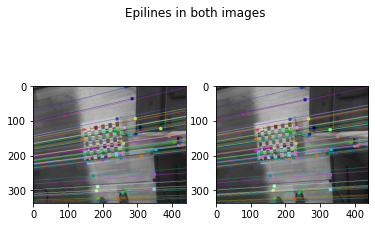

In [108]:
# Visualize epilines
# Adapted from: https://docs.opencv.org/master/da/de9/tutorial_py_epipolar_geometry.html
def drawlines(img1src, img2src, lines, pts1src, pts2src):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines '''
    r, c = img1src.shape[:2]
    img1color = cv2.cvtColor(img1src, cv2.COLOR_GRAY2BGR)
    img2color = cv2.cvtColor(img2src, cv2.COLOR_GRAY2BGR)
    # Edit: use the same random seed so that two images are comparable!
    np.random.seed(0)
    for r, pt1, pt2 in zip(lines, pts1src, pts2src):
        color = tuple(np.random.randint(0, 255, 3).tolist())
        x0, y0 = map(int, [0, -r[2]/r[1]])
        x1, y1 = map(int, [c, -(r[2]+r[0]*c)/r[1]])
        img1color = cv2.line(img1color, (x0, y0), (x1, y1), color, 1)
        img1color = cv2.circle(img1color, tuple(pt1), 5, color, -1)
        img2color = cv2.circle(img2color, tuple(pt2), 5, color, -1)
    return img1color, img2color


# Find epilines corresponding to points in right image (second image) and
# drawing its lines on left image
lines1 = cv2.computeCorrespondEpilines(
    pts2.reshape(-1, 1, 2), 2, fundamental_matrix)
lines1 = lines1.reshape(-1, 3)
img5, img6 = drawlines(img1, img2, lines1, pts1, pts2)

# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2 = cv2.computeCorrespondEpilines(
    pts1.reshape(-1, 1, 2), 1, fundamental_matrix)
lines2 = lines2.reshape(-1, 3)
img3, img4 = drawlines(img2, img1, lines2, pts2, pts1)

plt.subplot(121), plt.imshow(img5)
plt.subplot(122), plt.imshow(img3)
plt.suptitle("Epilines in both images")
plt.show()

In [109]:
# Stereo rectification (uncalibrated variant)
# Adapted from: https://stackoverflow.com/a/62607343
h1, w1 = img1.shape[:2]
h2, w2 = img2.shape[:2]
_, H1, H2 = cv2.stereoRectifyUncalibrated(
    np.float32(pts1), np.float32(pts2), fundamental_matrix, imgSize=(w1, h1)
)

In [110]:
# Undistort (rectify) the images and save them
# Adapted from: https://stackoverflow.com/a/62607343
img1_rectified = cv2.warpPerspective(img1, H1, (w1, h1))
img2_rectified = cv2.warpPerspective(img2, H2, (w2, h2))
cv2.imwrite("rectified_1.png", img1_rectified)
cv2.imwrite("rectified_2.png", img2_rectified)

True

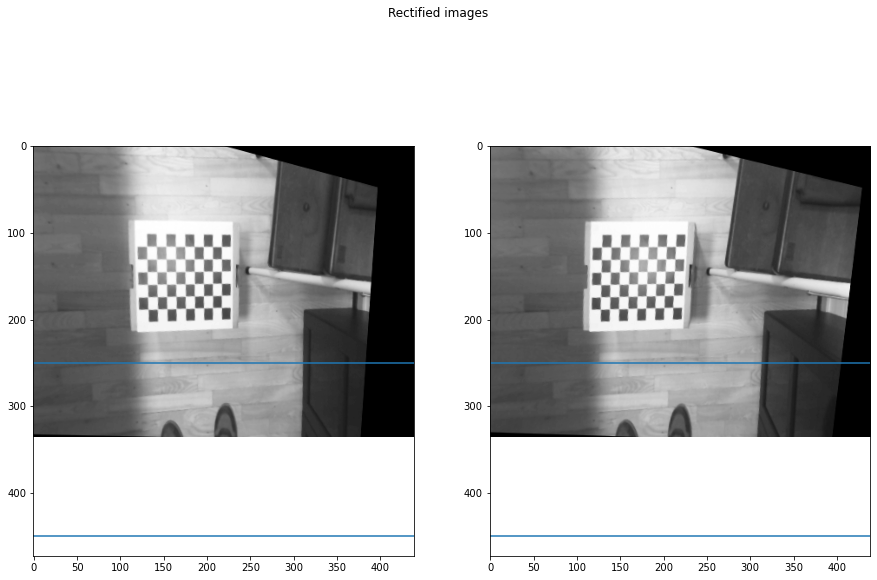

In [111]:
# Draw the rectified images
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
axes[0].imshow(img1_rectified, cmap="gray")
axes[1].imshow(img2_rectified, cmap="gray")
axes[0].axhline(250)
axes[1].axhline(250)
axes[0].axhline(450)
axes[1].axhline(450)
plt.suptitle("Rectified images")
plt.savefig("rectified_images.png")
plt.show()

In [112]:
def absoluteDifference(img1, img2):
    diff = cv2.absdiff(img1, img2)
    return diff

def correlation(img1, img2):
    return np.sum(absoluteDifference(img1, img2))



def findBestInRow(match, span, column):
    kernel_size =  len(match[0]), len(match)
    span_size = len(span[0]), len(span),
    best_score = float("inf")
    best_start = -1
    
    scope = 5
    start = column - kernel_size[0]*scope if column - kernel_size[0]*scope > 0 else 0
    end = column + kernel_size[0]*scope if column + kernel_size[0]*scope < span_size[0] - kernel_size[0] + 1 else span_size[0] - kernel_size[0] + 1

    for start in range(start, end):
        kernel = span[:, start:start+kernel_size[0]]
        score = correlation(match, kernel)
        if  score < best_score:
            best_score = score
            best_start = start
            
    return best_start, best_score  
    

In [113]:
kernel_size = (15,15)
best_starts = []
for row in range(len(img1) - kernel_size[1] + 1):
    best_starts.append([])
    for column in range(len(img1[0]) - kernel_size[0] + 1):
        kernel = img1[row:row+kernel_size[1], column:column+kernel_size[0]]
        best_start, best_score = findBestInRow(kernel, img2[row:row+kernel_size[1], :],column)
        best_starts[row].append((best_start, best_score))
    

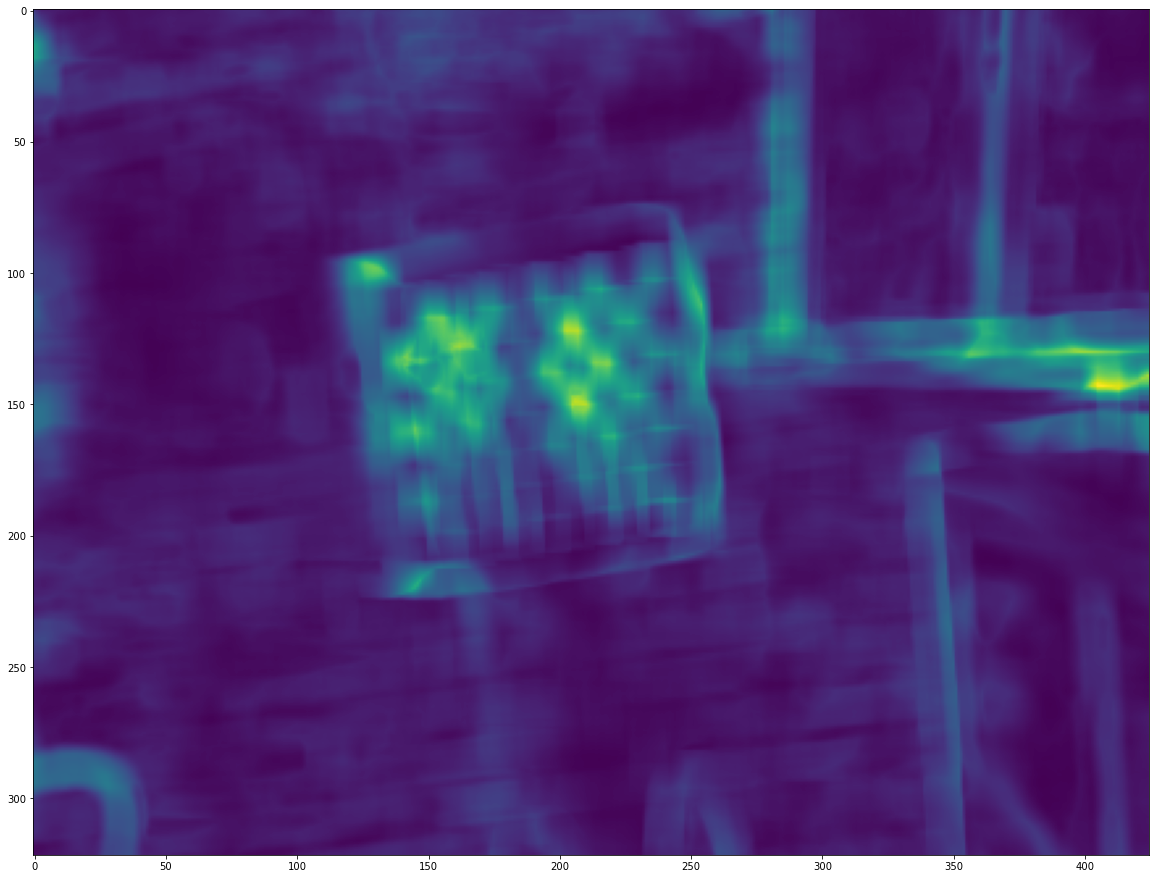

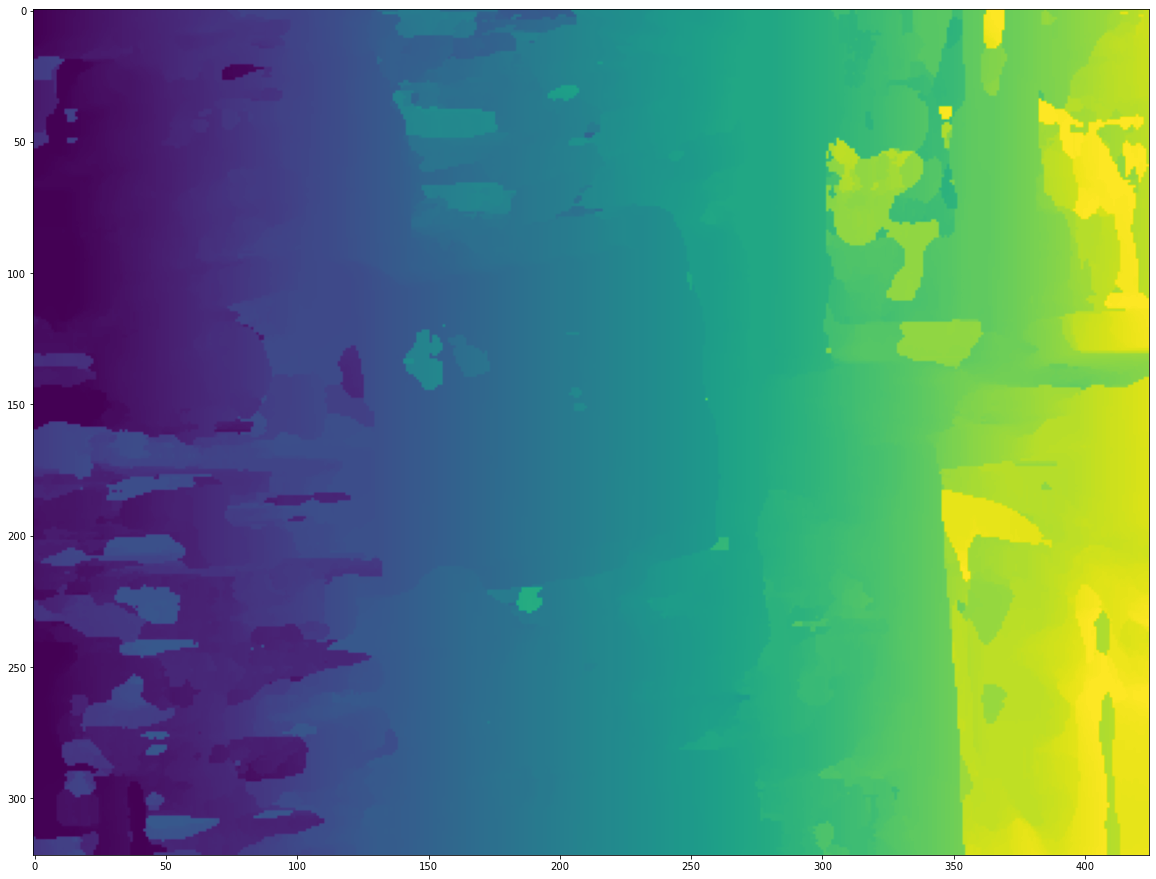

In [114]:
best_starts = np.array(best_starts)
plt.figure(figsize = (20,20))
plt.imshow(best_starts[:,:, 1])

plt.figure(figsize = (20,20))
plt.imshow(best_starts[:,:,0])

In [115]:
img_index = []
for row in range(len(img1) - kernel_size[1] + 1):
    img_index.append([])
    for column in range(len(img1[0]) - kernel_size[0] + 1):
        img_index[row].append(column)

(322, 425)
(322, 425, 2)


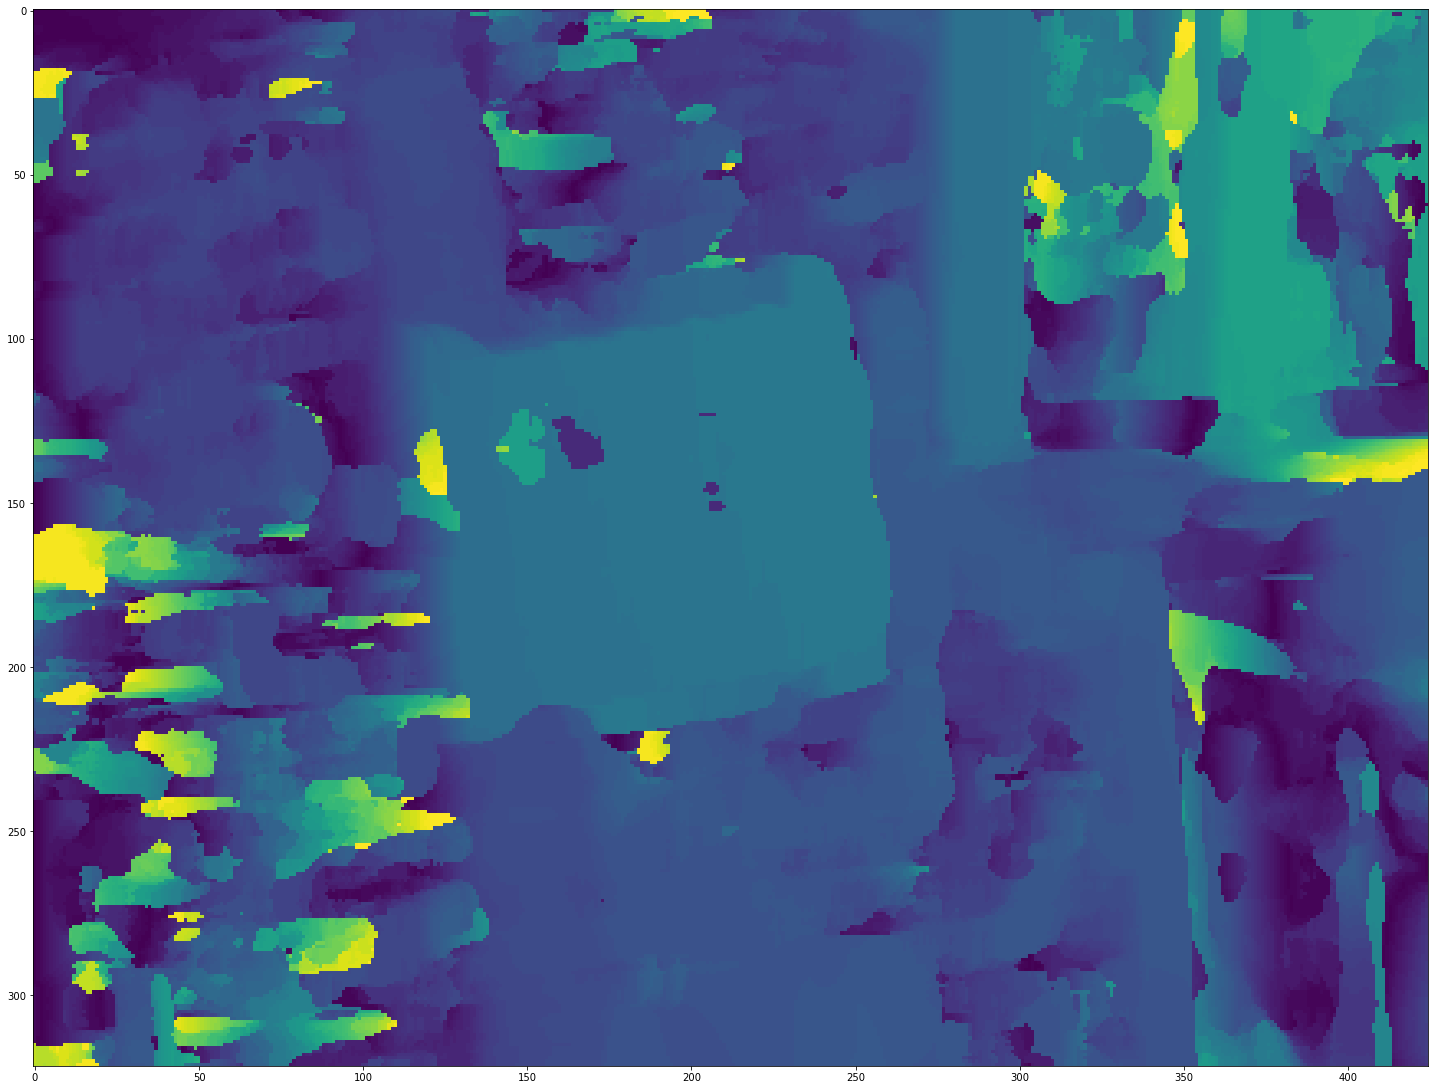

In [116]:
print(np.asarray(img_index).shape)
print(best_starts.shape)
img_index = np.asarray(img_index)
disp = abs(img_index[:322,:425]-best_starts[:,:,0])
plt.figure(figsize=(25,30))
plt.imshow(disp,"viridis")

SyntaxError: invalid syntax (3597971668.py, line 1)